In [16]:
from itertools import combinations
from Logica import *
#from Logica import Otoria, Ytoria, Descriptor, inorder_to_tree
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from types import MethodType

def escribir_rejilla(self, k):
    n, x, y = self.unravel(k)
    return f"{n+1} en ({x},{y})"
class Rejilla:

    '''
    Clase para representar el problema de poner
    un número distinto en cada una de las casillas
    de una rejilla nxn
    '''

    def __init__(self, X=3, Y=3):
        self.X = X
        self.Y = Y
        self.CM = Descriptor([X*Y, X, Y])
        self.CM.escribir = MethodType(escribir_rejilla, self.CM)
        r1 = self.regla1()
        r2 = self.regla2()
        r3 = self.regla3()
        r4 = self.regla4()
        r5 = self.regla5()
        r6_1 = self.regla6_1()
        r6_2 = self.regla6_2()
        self.reglas = [r1, r2, r3, r4, r5, r6_1, r6_2]

    def regla1(self):  # No puede haber ninguna casilla vacía
        casillas = [(x,y) for x in range(self.X) for y in range(self.Y)]
        lista = []
        for c in casillas:
            lista_o = []
            for n in range(self.X*self.Y):
                lista_o.append(self.CM.ravel([n,*c]))
            lista.append(Otoria(lista_o))
        return Ytoria(lista)

    def regla2(self):  #Cada celda tiene exactamente un valor
        casillas = [(x,y) for x in range(self.X) for y in range(self.Y)]
        lista = []
        for c in casillas:
            lista_o = []
            for n in range(self.X*self.Y):
                lista_o.append(self.CM.ravel([n,*c]))
            lista.append(Otoria(lista_o))
        return Ytoria(lista)

        
    def regla3(self):  #Cada número aparece exactamente una vez
        lista = []
        # Para cada número del 0 al 8 (que representa 1 al 9)
        for n in range(self.X * self.Y):
            # Al menos una casilla debe tener este número
            lista_o = []
            for x in range(self.X):
                for y in range(self.Y):
                    lista_o.append(self.CM.ravel([n, x, y]))
            # Este número debe aparecer al menos una vez
            lista.append(Otoria(lista_o))
            for x in range(self.X):
                for y in range(self.Y):
                    otras_casillas = [(x1,y1) for x1 in range(self.X) for y1 in range(self.Y) if (x1,y1) != (x,y)]
                    lista_o_neg = []
                    for k in otras_casillas:
                        lista_o_neg.append(self.CM.ravel([n, *k]))
                    if lista_o_neg:  # Solo si hay otras casillas
                        form = '(' + self.CM.ravel([n, x, y]) + '>-' + Otoria(lista_o_neg) + ')'
                        lista.append(form)
        return Ytoria(lista)

        
    def regla4(self):  # La suma de todos los números de las filas es 15
        filas = []
        for y in range(self.Y):  # Para cada fila
            combinaciones_si = []
            for n1 in range(self.X * self.Y):
                for n2 in range(self.X * self.Y):
                    n3 = 15 - n1 - n2
                    if 0 <= n3 < self.X * self.Y and n1 != n2 and n1 != n3 and n2 != n3:
                        form = Ytoria([
                            self.CM.ravel([n1, 0, y]),
                            self.CM.ravel([n2, 1, y]),
                            self.CM.ravel([n3, 2, y])
                        ])
                        combinaciones_si.append(form)
            if combinaciones_si:  # Solo agregar si hay combinaciones
                filas.append(Otoria(combinaciones_si))
        return Ytoria(filas) if filas else Ytoria([])

    def regla5(self):  # La suma de todos los números de las columnas es 15
        columnas = []
        for x in range(self.X):  # Para cada columna
            combinaciones_si = []
            for n1 in range(self.X * self.Y):
                for n2 in range(self.X * self.Y):
                    n3 = 15 - n1 - n2
                    if 0 <= n3 < self.X * self.Y and n1 != n2 and n1 != n3 and n2 != n3:
                        form = Ytoria([
                            self.CM.ravel([n1, x, 0]),
                            self.CM.ravel([n2, x, 1]),
                            self.CM.ravel([n3, x, 2])
                        ])
                        combinaciones_si.append(form)
            if combinaciones_si:
                columnas.append(Otoria(combinaciones_si))
        return Ytoria(columnas) if columnas else Ytoria([])

    def regla6_1(self):  # La suma de todos los números de la diagonal principal es 15
        diagonalX = []
        for n1 in range(self.X * self.Y):
            for n2 in range(self.X * self.Y):
                n3 = 15 - n1 - n2
                if 0 <= n3 < self.X * self.Y and n1 != n2 and n1 != n3 and n2 != n3:
                    form = Ytoria([
                        self.CM.ravel([n1, 0, 0]),
                        self.CM.ravel([n2, 1, 1]),
                        self.CM.ravel([n3, 2, 2])
                    ])
                    diagonalX.append(form)
        return Otoria(diagonalX) if diagonalX else Otoria([])

    def regla6_2(self):  # La suma de todos los números de la diagonal secundaria es 15
        diagonalY = []
        for n1 in range(self.X * self.Y):
            for n2 in range(self.X * self.Y):
                n3 = 15 - n1 - n2
                if 0 <= n3 < self.X * self.Y and n1 != n2 and n1 != n3 and n2 != n3:
                    form = Ytoria([
                        self.CM.ravel([n1, 2, 0]),
                        self.CM.ravel([n2, 1, 1]),
                        self.CM.ravel([n3, 0, 2])
                    ])
                    diagonalY.append(form)
        return Otoria(diagonalY) if diagonalY else Otoria([])

    def visualizar(self, I):
        fig, axes = plt.subplots()
        fig.set_size_inches(self.X, self.Y)
        step_x = 1. / self.X
        step_y = 1. / self.Y
        offset = 0.001
        tangulos = []
        tangulos.append(patches.Rectangle((0, 0), 1, 1, \
        facecolor = '#ADD8E6', edgecolor = 'black', linewidth = 2))
        u = self.X // 2 if self.X % 2 == 0 else self.X // 2 + 1
        v = self.Y // 2 if self.Y % 2 == 0 else self.Y // 2 + 1
        for i in range(u + 1):
            for j in range(v):
                tangulos.append(patches.Rectangle((2 * i * step_x, 2 * j * step_y), \
                                                step_x - offset, step_y, \
                                                facecolor = '#EADDCA', \
                                                ec = 'k', lw = 3))
                tangulos.append(patches.Rectangle((step_x + 2 * i * step_x, (2 * j + 1) * step_y), \
                                                step_x - offset, step_y, \
                                                facecolor = '#EADDCA', \
                                                ec = 'k', lw = 3))
        for t in tangulos:
            axes.add_patch(t)
        offsetX = 0.065
        offsetY = 0.065
        for k in I:
            n, X1, Y1 = self.CM.unravel(k)
            if I[k]:
                axes.text(X1 * step_x + step_x / 2, Y1 * step_y + step_y / 2, n+1, \
                        ha = "center", va = "center", size = 30, c = 'k')
        axes.axis('off')
        plt.show()  


In [17]:
r = Rejilla(X=3, Y=3)


ĺ


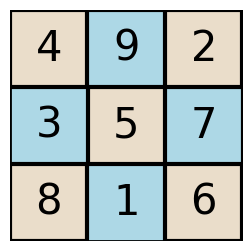

In [18]:
r = Rejilla(X=3, Y=3)
print(r.CM.ravel([4, 0, 2]))

numero_8 = r.CM.ravel([7, 0, 0])
numero_3 = r.CM.ravel([2, 0, 1])
numero_4 = r.CM.ravel([3, 0, 2])
numero_1 = r.CM.ravel([0, 1, 0])
numero_5 = r.CM.ravel([4, 1, 1])
numero_9 = r.CM.ravel([8, 1, 2])
numero_6 = r.CM.ravel([5, 2, 0])
numero_7 = r.CM.ravel([6, 2, 1])
numero_2 = r.CM.ravel([1, 2, 2])
I = {
    numero_8 : True,
    numero_3 : True,
    numero_4 : True,
    numero_1 : True,
    numero_5 : True,
    numero_9 : True,
    numero_6 : True,
    numero_7 : True,
    numero_2 : True
}
r.visualizar(I)


#0, 2   1, 2   2, 2
#0, 1   1, 1   2, 1
#0, 0   1, 0   2, 0